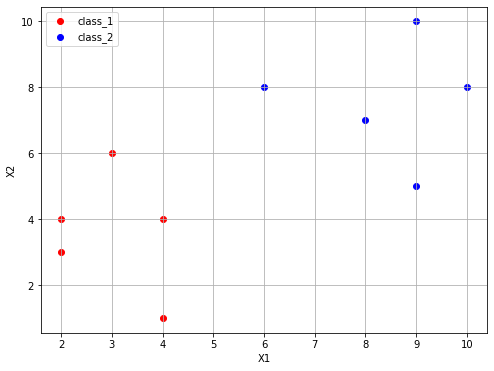

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data for class 1 and 2
data = {
    'X1': [4, 2, 2, 3, 4, 9, 6, 9, 8, 10],
    'X2': [1, 4, 3, 6, 4, 10, 8, 5, 7, 8],
    'class': ['class_1', 'class_1', 'class_1', 'class_1', 'class_1', 
              'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
}

# Create a dataframe
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(8, 6))
for class_type, color in zip(['class_1', 'class_2'], ['red', 'blue']):
    plt.scatter(df[df['class'] == class_type]['X1'], df[df['class'] == class_type]['X2'], color=color, label=class_type)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


1. Calculate the mean of each feature for every class.

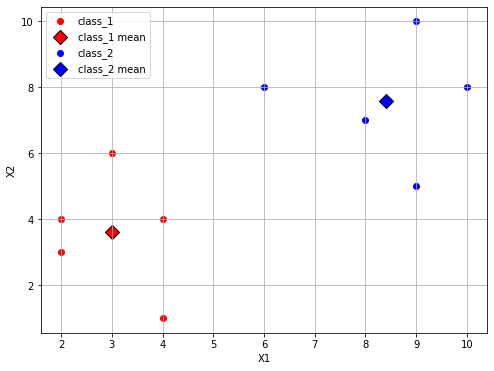

In [2]:
# Compute mean vectors for each class
mean_vectors = df.groupby('class').mean()

# Add mean vectors to the plot
plt.figure(figsize=(8, 6))
for class_type, color in zip(['class_1', 'class_2'], ['red', 'blue']):
    plt.scatter(df[df['class'] == class_type]['X1'], df[df['class'] == class_type]['X2'], color=color, label=class_type)
    plt.scatter(mean_vectors.loc[class_type]['X1'], mean_vectors.loc[class_type]['X2'], color=color, edgecolor='black', marker='D', s=100, label=f'{class_type} mean')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
mean_vectors

,X1,X2
class,,
class_1,3.0,3.6
class_2,8.4,7.6


2. Compute the within-class scatter matrix (SW): Measure the dispersion of data points within each class by calculating the sum of the squared differences between the individual data points and their corresponding class mean vectors.

In [18]:
import numpy as np

# Initialize scatter matrix
SW = np.zeros((2,2))

# Calculate scatter matrix for each class and add them to get SW
for class_type in ['class_1', 'class_2']:
    scatter_matrix = np.zeros((2,2))
    mean_vector = mean_vectors.loc[class_type].values
    class_data = df[df['class'] == class_type][['X1', 'X2']].values
    for row in class_data:
        row, mv = row.reshape(2,1), mean_vector.reshape(2,1) # make column vectors
        scatter_matrix += (row-mv).dot((row-mv).T)
    SW += scatter_matrix

print("Within-class Scatter Matrix SW:")
print(SW)


Within-class Scatter Matrix SW:
[[13.2 -2.2]
 [-2.2 26.4]]


3. Compute the between-class scatter matrix (SB): Measure the dispersion between different classes by calculating the sum of the squared differences between the class mean vectors and the overall mean vector. 

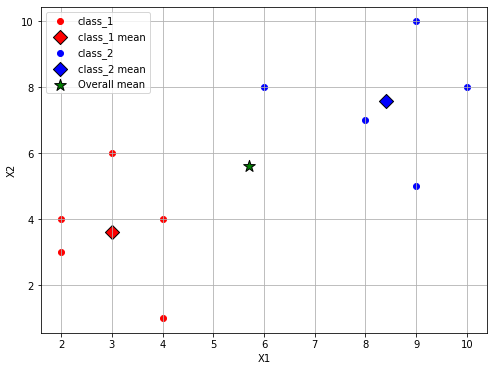

In [23]:
# Compute overall mean vector
overall_mean = mean_vectors.mean()

# Add overall mean vector and class-wise mean vectors to the plot
plt.figure(figsize=(8, 6))
for class_type, color in zip(['class_1', 'class_2'], ['red', 'blue']):
    plt.scatter(df[df['class'] == class_type]['X1'], df[df['class'] == class_type]['X2'], color=color, label=class_type)
    plt.scatter(mean_vectors.loc[class_type]['X1'], mean_vectors.loc[class_type]['X2'], color=color, edgecolor='black', marker='D', s=100, label=f'{class_type} mean')

# Add overall mean to the plot
plt.scatter(overall_mean['X1'], overall_mean['X2'], color='green', edgecolor='black', marker='*', s=150, label='Overall mean')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Initialize between-class scatter matrix
SB = np.zeros((2,2))

# Calculate between-class scatter matrix
for class_type in ['class_1', 'class_2']:
    n = len(df[df['class'] == class_type]) # number of samples in each class
    mean_vector = mean_vectors.loc[class_type].values.reshape(2,1) # make column vector
    overall_mean_vector = overall_mean.values.reshape(2,1) # make column vector
    SB += n * (mean_vector - overall_mean_vector).dot((mean_vector - overall_mean_vector).T)

print("Between-class Scatter Matrix SB:")
print(SB)


Between-class Scatter Matrix SB:
[[72.9 54. ]
 [54.  40. ]]


4. Compute the eigenvectors and eigenvalues: Find the eigenvectors and eigenvalues of the matrix (SW^-1 * SB). These eigenvectors represent the directions for the new feature space, and their corresponding eigenvalues signify the importance of each direction in maximizing the class separability.


- A = (SW^-1 * SB)
- det(A - λI) = 0 (λ is eigenvalues)
- (A - λI)v = 0 (v is eigenvectors)

In [25]:
# compute the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))

5. Sort the eigenvectors by decreasing eigenvalues: Arrange the eigenvectors in descending order based on their eigenvalues. This ranks the eigenvectors according to their contribution to the class separation.

In [29]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Print the sorted (eigenvalue, eigenvector) tuples
print('Eigenvalues and eigenvectors (sorted by eigenvalue from high to low):')
for i, pair in enumerate(eig_pairs):
    print('Eigenvalue {}: {}'.format(i+1, pair[0]))
    print('Eigenvector {}: \n{}'.format(i+1, pair[1].reshape(2,1)))
    print()


Eigenvalues and eigenvectors (sorted by eigenvalue from high to low):
Eigenvalue 1: 7.828425096030731
Eigenvector 1: 
[[0.91955932]
 [0.39295122]]

Eigenvalue 2: 2.220446049250313e-16
Eigenvector 2: 
[[-0.59522755]
 [ 0.80355719]]



6. Select the top k eigenvectors: Choose the top k eigenvectors with the largest eigenvalues, where k is the number of dimensions you want to reduce your dataset to. 

In [30]:
# Number of discriminant vectors to keep
k = 1

# Get the top k eigenvectors
W = np.hstack([pair[1].reshape(2,1) for pair in eig_pairs[:k]])

print("Matrix W (containing top k={} eigenvectors):".format(k))
print(W)


Matrix W (containing top k=1 eigenvectors):
[[0.91955932]
 [0.39295122]]


7. Transform the dataset: Multiply the original dataset with the transformation matrix W to obtain the reduced-dimensional dataset. 

In [31]:
# Original data
X = df[['X1', 'X2']].values

# Transform the data using matrix W
X_lda = X.dot(W)

# Create a dataframe of the transformed data
df_lda = pd.DataFrame(X_lda, columns=['LD1'])
df_lda['class'] = df['class']

print(df_lda)


         LD1    class
0   4.071188  class_1
1   3.410924  class_1
2   3.017972  class_1
3   5.116385  class_1
4   5.250042  class_1
5  12.205546  class_2
6   8.660966  class_2
7  10.240790  class_2
8  10.107133  class_2
9  12.339203  class_2


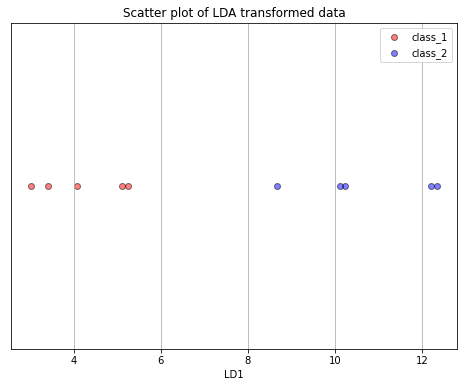

In [33]:
plt.figure(figsize=(8, 6))

# Plot each class' points separately
for class_type, color in zip(['class_1', 'class_2'], ['red', 'blue']):
    plt.scatter(df_lda[df_lda['class'] == class_type]['LD1'], [0]*len(df_lda[df_lda['class'] == class_type]),
                color=color, label=class_type, alpha=0.5, edgecolors='black')

plt.title('Scatter plot of LDA transformed data')
plt.xlabel('LD1')
plt.yticks([]) # Hide the y-axis
plt.legend()
plt.grid(True)
plt.show()


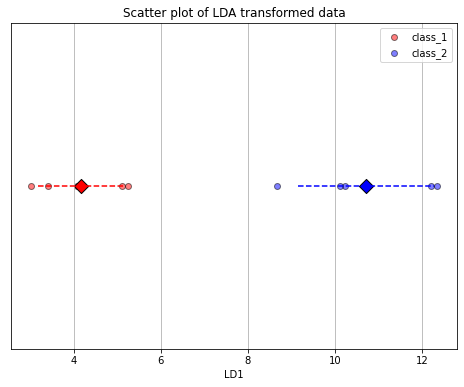

In [34]:
plt.figure(figsize=(8, 6))

# Plot each class' points separately
for class_type, color in zip(['class_1', 'class_2'], ['red', 'blue']):
    class_data = df_lda[df_lda['class'] == class_type]['LD1']
    plt.scatter(class_data, [0]*len(class_data),
                color=color, label=class_type, alpha=0.5, edgecolors='black')
    
    # Plot class mean
    class_mean = class_data.mean()
    plt.scatter(class_mean, 0, color=color, edgecolor='black', marker='D', s=100)
    
    # Plot standard deviation lines
    plt.hlines(0, class_mean - class_data.std(), class_mean + class_data.std(), color=color, linestyles='dashed')

plt.title('Scatter plot of LDA transformed data')
plt.xlabel('LD1')
plt.yticks([]) # Hide the y-axis
plt.legend()
plt.grid(True)
plt.show()
